# Import Libraries

In [2]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Regression using only Climate Score and Lane 

In [3]:
# Load your data
df = pd.read_csv("../Clean Data/regression_dataset.csv")

# Select features and target
X = df[["Lane Count", "ClimateType"]]
y = df["Estimated Monthly Consumption (kWh)"]

# Split data (simple random split; replace with group-wise split if needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=25)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=25)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f} kWh")
print(f"R² Score: {r2:.2f}")

MAE: 278.89 kWh
R² Score: -0.02


# Accuracy Visualization

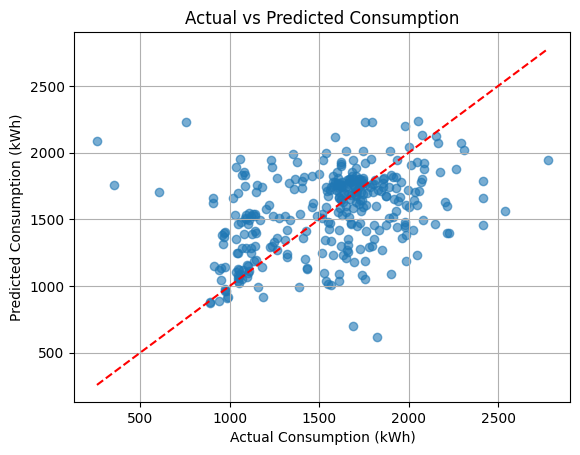

In [4]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Consumption (kWh)")
plt.ylabel("Predicted Consumption (kWh)")
plt.title("Actual vs Predicted Consumption")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.grid(True)
plt.show()


In [5]:
importances = model.feature_importances_
feature_names = X.columns
for name, importance in zip(feature_names, importances):
    print(f"{name}: {importance:.3f}")


Lane Count: 0.252
ClimateType: 0.748


## Export

In [7]:
import joblib
joblib.dump(model, "Exports/Consumption Model/random_forest_consumption_model_lane_climate.pkl")

['Exports/Consumption Model/random_forest_consumption_model_lane_climate.pkl']